In [1]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 11.0 MB/s eta 0:00:00


In [2]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("Uploaded:", file_name)

Saving Screenshot 2025-09-17 121254.png to Screenshot 2025-09-17 121254.png
Uploaded: Screenshot 2025-09-17 121254.png


In [4]:
model=YOLO('yolov8n.pt')

In [5]:
results = model(file_name)
annotated = results[0].plot()


image 1/1 /content/Screenshot 2025-09-17 121254.png: 320x640 2 persons, 2 couchs, 2 potted plants, 257.7ms
Speed: 14.6ms preprocess, 257.7ms inference, 35.1ms postprocess per image at shape (1, 3, 320, 640)


(np.float64(-0.5), np.float64(1031.5), np.float64(484.5), np.float64(-0.5))

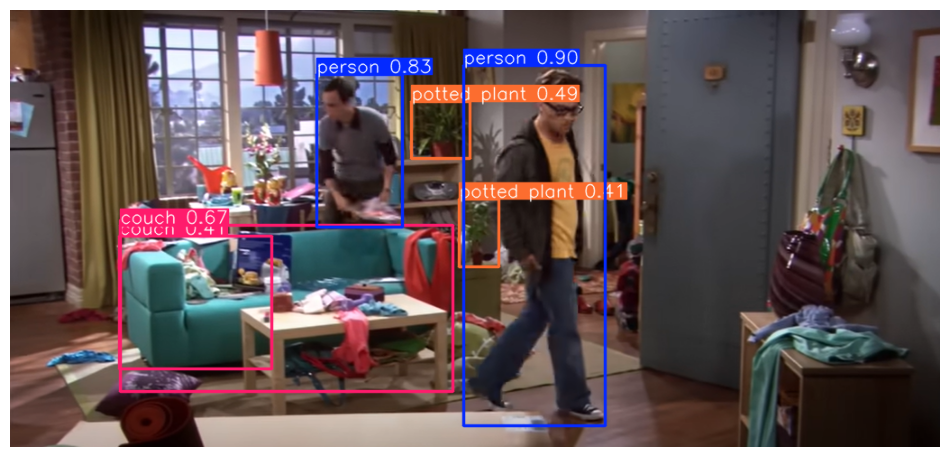

In [6]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')

In [7]:
uploaded=files.upload()
video_path=list(uploaded.keys())[0]
print("Uploaded:",video_path)

Saving test.mp4 to test.mp4
Uploaded: test.mp4


In [8]:
output_path="output_detected.mp4"
cap=cv2.VideoCapture(video_path)
width=int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height=int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps=cap.get(cv2.CAP_PROP_FPS)or 25.0
fourcc=cv2.VideoWriter_fourcc(*'mp4v')
out=cv2.VideoWriter(output_path,fourcc,fps,(width,height))

frame_count=0
while True:
  ret, frame= cap.read()
  if not ret:
    break
  results=model(frame)
  annotated=results[0].plot()
  out.write(annotated)
  frame_count+=1
  if frame_count%50==0:
    print(f"Processed {frame_count} frames")
cap.release()
out.release()

print("Video Saved:",output_path)
files.download(output_path)


0: 320x640 2 persons, 1 cup, 1 bowl, 89.0ms
Speed: 2.2ms preprocess, 89.0ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 2 persons, 1 cup, 83.0ms
Speed: 1.7ms preprocess, 83.0ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 persons, 1 cup, 80.4ms
Speed: 1.5ms preprocess, 80.4ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 3 persons, 1 cup, 80.2ms
Speed: 2.3ms preprocess, 80.2ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 2 persons, 1 cup, 81.7ms
Speed: 2.5ms preprocess, 81.7ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 2 persons, 1 cup, 1 bowl, 84.9ms
Speed: 2.2ms preprocess, 84.9ms inference, 0.9ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 2 persons, 1 cup, 1 bowl, 88.1ms
Speed: 1.9ms preprocess, 88.1ms inference, 1.1ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 2 persons, 1 cup, 1 bowl, 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Captured: snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 1 person, 178.0ms
Speed: 1.7ms preprocess, 178.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)


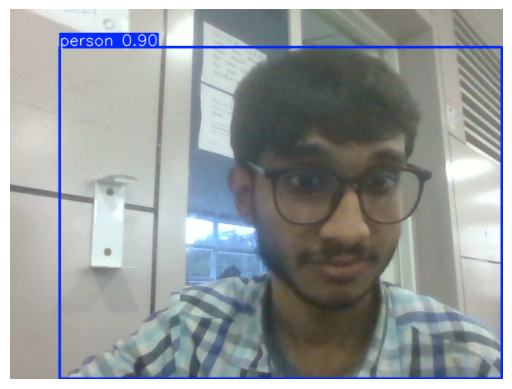

In [10]:

!pip install -q ultralytics opencv-python-headless pillow
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from base64 import b64decode
from google.colab import output

model = YOLO('yolov8n.pt')


def take_photo(filename='snapshot.jpg'):
    js = """
    async function takePhoto() {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      document.body.appendChild(div);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize window
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture button
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getTracks().forEach(track => track.stop());
      const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
      div.remove();
      return imgData;
    }
    takePhoto();
    """
    data = output.eval_js(js)
    with open(filename, 'wb') as f:
        f.write(b64decode(data))
    return filename

filename = take_photo('snapshot.jpg')
print("Captured:", filename)


results = model(filename)
annotated = results[0].plot()
plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


Saving Screenshot 2025-09-17 121059.png to Screenshot 2025-09-17 121059.png
Processing Screenshot 2025-09-17 121059.png...

image 1/1 /content/Screenshot 2025-09-17 121059.png: 288x640 4 persons, 1 tie, 83.8ms
Speed: 1.7ms preprocess, 83.8ms inference, 1.3ms postprocess per image at shape (1, 3, 288, 640)


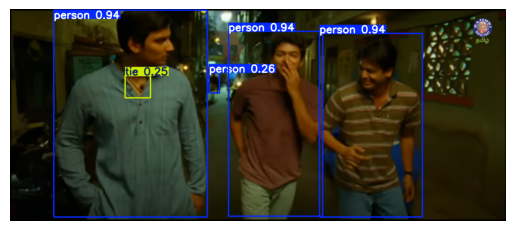

In [11]:
from google.colab import files
import glob
import cv2
import matplotlib.pyplot as plt


uploaded = files.upload()


for img_name in uploaded.keys():
    print(f"Processing {img_name}...")
    results = model(img_name)
    annotated = results[0].plot()
    plt.imshow(cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [12]:
!pip install ultralytics
from ultralytics import YOLO

In [13]:
model=YOLO('yolov8n.pt')

In [15]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128n

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  6855k      0 --:--:-- --:--:-- --:--:-- 6855k
replace dataset/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/coco128/images/train2017/000000000612.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/coco128/images/train2017/000000000404.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/coco128/images/train2017/000000000438.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/coco128/images/train2017/000000000389.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace dataset/coco128/images/train2017/000000000564.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace dataset/coco128/images/train2017/000000000564.jpg? [y]es, [n]o, [A]ll, [N]

In [16]:
%%writefile dataset/coco128.yaml
path: dataset/coco128
train: images/train2017
val: images/train2017

nc: 80
names:
  0: person
  1: bicycle
  2: car
  3: motorcycle
  4: airplane
  5: bus
  6: train
  7: truck
  8: boat
  9: traffic light
  10: fire hydrant
  11: stop sign
  12: parking meter
  13: bench
  14: bird
  15: cat
  16: dog
  17: horse
  18: sheep
  19: cow
  20: elephant
  21: bear
  22: zebra
  23: giraffe
  24: backpack
  25: umbrella
  26: handbag
  27: tie
  28: suitcase
  29: frisbee
  30: skis
  31: snowboard
  32: sports ball
  33: kite
  34: baseball bat
  35: baseball glove
  36: skateboard
  37: surfboard
  38: tennis racket
  39: bottle
  40: wine glass
  41: cup
  42: fork
  43: knife
  44: spoon
  45: bowl
  46: banana
  47: apple
  48: sandwich
  49: orange
  50: broccoli
  51: carrot
  52: hot dog
  53: pizza
  54: donut
  55: cake
  56: chair
  57: couch
  58: potted plant
  59: bed
  60: dining table
  61: toilet
  62: tv
  63: laptop
  64: mouse
  65: remote
  66: keyboard
  67: cell phone
  68: microwave
  69: oven
  70: toaster
  71: sink
  72: refrigerator
  73: book
  74: clock
  75: vase
  76: scissors
  77: teddy bear
  78: hair drier
  79: toothbrush

Writing dataset/coco128.yaml


In [17]:
model = YOLO("yolov8n.pt")
model.train(
    data="/content/dataset/coco128.yaml",
    epochs=10,
    imgsz=640,
    project="YOLO_Training",
    name="yolov8n_custom"
)

Ultralytics 8.3.201 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (AMD EPYC 7B12)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/coco128.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a50bbda5400>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,


image 1/1 /content/dataset/coco128/images/train2017/000000000009.jpg: 480x640 3 bowls, 2 oranges, 1 broccoli, 1 hot dog, 156.6ms
Speed: 1.6ms preprocess, 156.6ms inference, 2.6ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/YOLO_Training/yolov8n_custom2


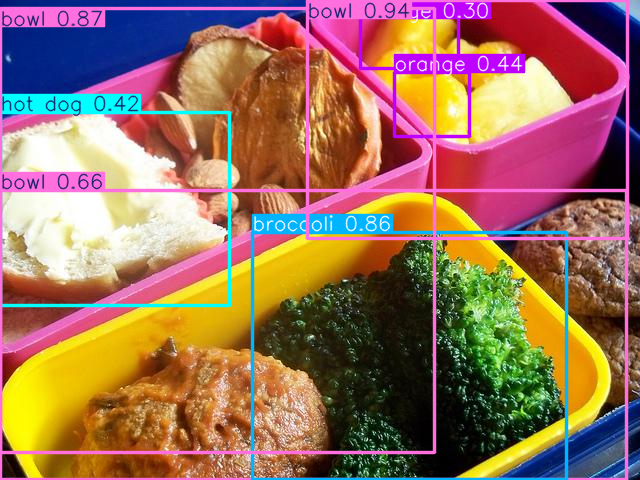

In [18]:
results=model.predict("/content/dataset/coco128/images/train2017/000000000009.jpg",save=True)
results[0].show()

In [1]:
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

In [5]:
%%writefile app_streamlit.py
import streamlit as st
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2, tempfile, os, glob
import pandas as pd
from pathlib import Path

st.set_page_config(page_title="Object Detection", layout="wide")

# Light theme background with overlay for readability
background_url = "https://i.ibb.co/spPLz8Py/bg-light.jpg"

st.markdown(
    f"""
    <style>
    /* Main app background */
    .stApp {{
        background: url("{background_url}") no-repeat center center fixed;
        background-size: cover;
    }}

    /* Overlay to improve readability */
    .stApp::before {{
        content: "";
        position: fixed;
        top: 0;
        left: 0;
        width: 100%;
        height: 100%;
        background-color: rgba(255, 255, 255, 0.7);
        z-index: -1;
    }}

    /* Sidebar styling */
    section[data-testid="stSidebar"] {{
        background: rgba(255, 255, 255, 0.95);
        backdrop-filter: blur(5px);
        border-radius: 12px;
        padding: 15px;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
    }}

    /* File uploader styling */
    div[data-testid="stFileUploader"] {{
        background: rgba(255, 255, 255, 0.95);
        backdrop-filter: blur(5px);
        border-radius: 12px;
        padding: 15px;
        box-shadow: 0 2px 10px rgba(0,0,0,0.1);
    }}

    /* DataFrame styling */
    .stDataFrame {{
        background: rgba(245, 245, 245, 0.95);
        border-radius: 12px;
        padding: 12px;
        box-shadow: 0 4px 10px rgba(0,0,0,0.1);
    }}

    /* Dark text */
    h1, h2, h3, h4, h5, h6, p, label, span, div {{
        color: #111111 !important;
        font-weight: 500;
    }}
    </style>
    """,
    unsafe_allow_html=True
)

st.title("🟢 Object Detection")

# Sidebar inputs
uploaded_weights = st.sidebar.file_uploader("Upload custom YOLO weights (.pt)", type=["pt"])
conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1280], index=2)

@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
    return YOLO(weights_path)

def save_uploaded_file(uploaded_file, suffix=""):
    suffix = suffix if suffix else Path(uploaded_file.name).suffix
    tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
    tf.write(uploaded_file.getbuffer())
    tf.flush()
    return tf.name

def annotate_and_table(results, model):
    res = results[0]
    try:
        plotted = res.plot()
        annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
    except Exception:
        annotated = res.orig_img if hasattr(res, "orig_img") else None

    detections = []
    try:
        boxes = res.boxes
        if boxes is not None and len(boxes) > 0:
            for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):
                detections.append({"class": model.names[int(c)], "conf": float(cf), "bbox": [float(x) for x in box]})
    except:
        detections = []

    return annotated, pd.DataFrame(detections)

# Load YOLO model
weights_to_load = "yolov8n.pt"
if uploaded_weights:
    weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
    st.sidebar.success("Using uploaded weights")

model = load_model(weights_to_load)

# Input mode
mode = st.radio("Select input type", ["Image upload", "Video upload"], horizontal=True)

if mode == "Image upload":
    uploaded_img = st.file_uploader("Upload an image", type=["jpg", "jpeg", "png"])
    if uploaded_img:
        img = Image.open(uploaded_img).convert("RGB")
        st.image(img, caption="Input image", use_column_width=True)
        results = model.predict(np.array(img), conf=conf, imgsz=img_size)
        annotated, df = annotate_and_table(results, model)
        if annotated is not None:
            st.image(annotated, caption="Annotated image", use_column_width=True)
        if not df.empty:
            st.dataframe(df)

elif mode == "Video upload":
    uploaded_vid = st.file_uploader("Upload a video", type=["mp4", "mov", "avi", "mkv"])
    if uploaded_vid:
        tmp_path = save_uploaded_file(uploaded_vid)
        st.video(tmp_path)
        project_dir = tempfile.mkdtemp()
        results = model.predict(source=tmp_path, conf=conf, imgsz=img_size, project=project_dir, name="run", save=True)
        try:
            out_dir = str(results[0].save_dir)
            annotated_videos = [v for v in glob.glob(os.path.join(out_dir, "*")) if Path(v).suffix.lower() in [".mp4", ".avi", ".mov", ".mkv"]]
            if annotated_videos:
                st.success("Annotated video:")
                st.video(annotated_videos[0])
        except Exception as e:
            st.warning(f"Could not display annotated video: {e}")


Overwriting app_streamlit.py


In [ ]:
from pyngrok import ngrok


NGROK_AUTH_TOKEN = "32mxkqqrXFsYICTDQM0rYGADxFT_6swceH6TZ3bns9gTZ2S9B"
ngrok.set_auth_token(NGROK_AUTH_TOKEN)


public_url = ngrok.connect(8501)
print("Public URL:", public_url)


!streamlit run app_streamlit.py --server.port 8501 &

import time
while True:
    time.sleep(60)

Public URL: NgrokTunnel: "https://ce6a88b12158.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.155.219.210:8501

2025-09-17 07:53:59.278 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_

0: 320x640 2 persons, 1 chair, 2 couchs, 3 potted plants, 146.3ms
Speed: 10.9ms preprocess, 146.3ms inference, 1.9ms postprocess per image at shape (1, 3, 320, 640)
2025-09-17 07:54:33.872 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultr